<a href="https://colab.research.google.com/github/menguelx7/Diplodatos-IML-Grupo_1/blob/main/IML_Grupo_N%C2%B01_Lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IML- Año 2022

# GRUPO 1- Trabajo práctico entregable parte N°1
**********************************************************************

Integrantes: 


*   Laura Ailin Feu Marquestau
*   Matias Miguel Mengual Figueroa 
*   Marcelo Perea
*   Natalia Giselle Tassin
*   Ignacio Villagra Torcomian



# Laboratorio 1: Regresión en Boston

En este laboratorio deben hacer experimentos de regresión con el conjunto de datos "Boston house prices dataset".

Estudiarán el dataset, harán visualizaciones y seleccionarán atributos relevantes a mano.

Luego, entrenarán y evaluarán diferentes tipos de regresiones, buscando las configuraciones que mejores resultados den.

In [ ]:
import io
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import seaborn as sns

np.set_printoptions(suppress=True)  # para no usar notacion "e"

## Carga del Conjunto de Datos

Cargamos el conjunto de datos y vemos su contenido.

In [ ]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [ ]:
#Como buena práctica, se hace una copia del dataset
data_boston = boston.copy() 
print(data_boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
#data_boston['data']          # matriz con los datos de entrada (atributos)
#data_boston['target']        # vector de valores a predecir
data_boston['feature_names']  # nombres de los atributos para cada columna de 'data'

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [ ]:
#Se crean tantas variables como columnas del data set
#Listado EN ORDEN de atributos/variables a analizar del data set
CRIM_feature= data_boston['data'][:,0]  
ZN_feature= data_boston['data'][:,1]
INDUS_feature= data_boston['data'][:,2]
CHAS_feature= data_boston['data'][:,3]
NOX_feature= data_boston['data'][:,4]
RM_feature= data_boston['data'][:,5]
AGE_feature= data_boston['data'][:,6]
DIS_feature= data_boston['data'][:,7]
RAD_feature= data_boston['data'][:,8]
TAX_feature= data_boston['data'][:,9]
PTRATIO_feature= data_boston['data'][:,10]
B_feature= data_boston['data'][:,11]
LSTAT_feature= data_boston['data'][:,12]

#Variable target del data set:
PRICE_feature= data_boston['target']

In [ ]:
#Se crea un data frame donde cada columna corresponde a un atributo (en orden)
#Se agrega al data frame como última columna la variable ´target´
df_boston = pd.DataFrame({'CRIM':CRIM_feature,
                   'ZN': ZN_feature,
                   'INDUS':INDUS_feature,
                   'CHAS':CHAS_feature,
                   'NOX':NOX_feature,
                   'RM':RM_feature,
                   'AGE':AGE_feature,
                   'DIS':DIS_feature,
                   'RAD': RAD_feature,
                   'TAX':TAX_feature,
                   'PTRATIO':PTRATIO_feature,
                   'B': B_feature,
                   'LSTAT': LSTAT_feature,
                   'PRICE': PRICE_feature})

df_boston.shape

(506, 14)

In [ ]:
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
df_boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## División en Entrenamiento y Evaluación

Dividimos aleatoriamente los datos en 80% para entrenamiento y 20% para evaluación:

In [ ]:
from sklearn.model_selection import train_test_split
X, y = data_boston['data'], data_boston['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)
X_train.shape, X_test.shape

((404, 13), (102, 13))

## Ejercicio 1: Descripción de los Datos y la Tarea

Responda las siguientes preguntas:

1. ¿De qué se trata el conjunto de datos?
2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?
3. ¿Qué información (atributos) hay disponibles para hacer la predicción?
4. ¿Qué atributos imagina ud. que serán los más determinantes para la predicción?
5. ¿Qué problemas observa a priori en el conjunto de datos? ¿Observa posibles sesgos, riesgos, dilemas éticos, etc? Piense que los datos pueden ser utilizados para hacer predicciones futuras.

**Respuestas**
***************************************************************************
1. El data set contiene información asociada a las viviendas/vecindarios/alrededores en Boston. Contiene 506 instancias, cada una de ellas contiene 13 atributos de carácter numérico o categórico y el atributo n°14 que representa la variable 'target'.

2. La variable objetivo que intentaremos predecir es el atributo n°14, su significado es el valor medio de las viviendas en Boston ocupadas por sus propietarios en miles de dólares.

3. Los 13 atributos (en orden) que hay disponibles para hacer esta predicción son los siguientes:

    • *CRIM*: tasa de criminalidad per cápita por ciudad.

    • *ZN*: proporción de suelo residencial zonificado para lotes de más de 25,000 pies cuadrados.

    • *INDUS*: proporción de acres comerciales no minoristas por ciudad.

    • *CHAS*: variable binaria que es unitaria si el tramo limita con el río 'Charles', caso contrario vale cero.

    • *NOX*: concentración de óxidos nítricos en partes por 10 millones.

    • *RM*: promedio de cuartos por vivienda.

    • *AGE*: proporción de viviendas ocupadas por sus propietarios construidas antes de 1940.

    • *DIS*: distancias ponderadas a cinco centros de empleo de Boston.

    • *RAD*: índice de accesibilidad a carreteras/autopistas radiales.

    • *TAX*: relación entre el valor total de la propiedad y el impuesto a la misma por 10,000 USD.

    • *PTRATIO*: proporción alumno/maestro por ciudad.

    • *B*: 1000(Bk - 0.63)^2 donde Bk es la proporción de gente de color en la ciudad.
 
    • *LSTAT*: porcentaje de población con bajos recursos/bajo estrato social.
    

4. Los atributos más adecuados para la predicción del precio de las viviendas creemos que son aquellos que afectan directamente las características de las viviendas (RM y TAX) y aquellos que tienen que ver con la zona aledaña a las mismas y a sus características (CRIM, ZN, CHAS, NOX, DIS, RAD y PTRATIO).


5. El conjunto de datos presenta serios problemas de sesgo y dilemas éticos ya que tiene algunos atributos que NO deberían estar relacionados con la predicción del precio de las viviendas como lo son: AGE, B y LSTAT.


## Ejercicio 2: Visualización de los Datos

1. Para cada atributo de entrada, haga una gráfica que muestre su relación con la variable objetivo.
2. Estudie las gráficas, identificando **a ojo** los atributos que a su criterio sean los más informativos para la predicción.
3. Para ud., ¿cuáles son esos atributos? Lístelos en orden de importancia.

********************************************************
Se grafica a continuación  la variable ´target´ versus uno a uno los atributos del data set.

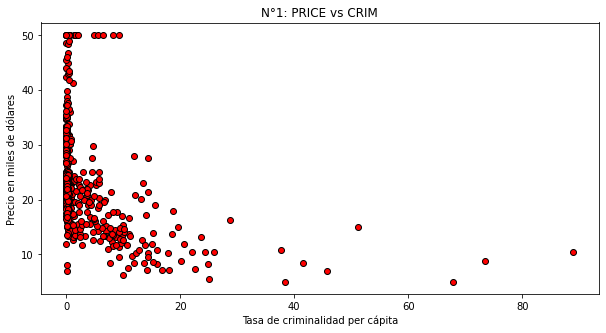

In [ ]:
#Atributo N°1 CRIM: Tasa de criminalidad per cápita
y= PRICE_feature
x= CRIM_feature
plt.figure(figsize=(10,5))
plt.scatter(x, y, facecolor="red", edgecolor="k", label="datos")
plt.title('N°1: PRICE vs CRIM')
plt.ylabel('Precio en miles de dólares')
plt.xlabel('Tasa de criminalidad per cápita')
plt.show()

Si se analiza el atributo CRIM, se puede ver que existe una relación con la variable PRICE. Si bien se observa que en algunos de los valores más altos de tasa de criminalidad per cápita se pueden ver los menores precios, no es una tendencia que se mantenga en todos los eventos. Incluso los valores más altos de vivienda parecieran NO depender de la variable CRIM.

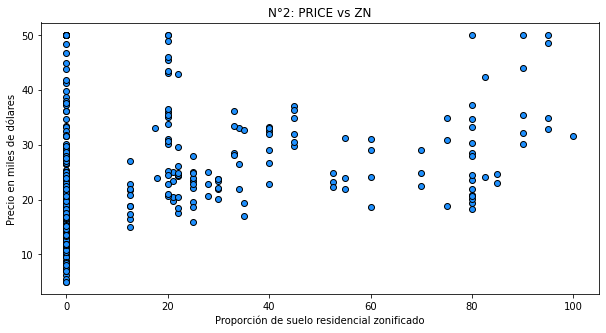

In [ ]:
#Atributo N°2 ZN: Proporción de suelo residencial zonificado para lotes de más de 25,000 ft²
y= PRICE_feature
x= ZN_feature
plt.figure(figsize=(10,5))
plt.scatter(x, y, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.title('N°2: PRICE vs ZN')
plt.ylabel('Precio en miles de dólares')
plt.xlabel('Proporción de suelo residencial zonificado')
plt.show()

Si se analiza la variable ZN que representa la proporción de suelo residencial zonificado para lotes mayores a 25000 ft², se pueden ver "estratos" de acuerdo a los valores que adopta el atributo ZN pero no se puede inferir una relación directa con la variable PRICE debido a que en cada uno de los estratos de ZN se puede encontrar prácticamente todo el rango de precios.

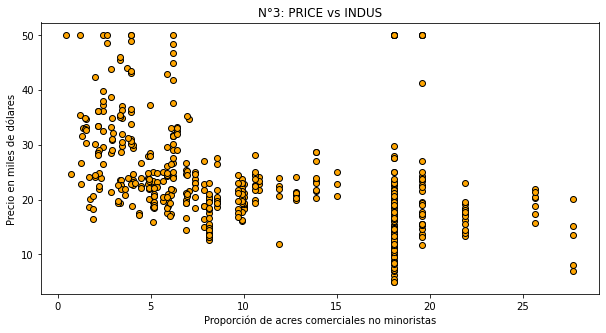

In [ ]:
#Atributo N°3 INDUS: Proporción de acres comerciales no minoristas
y= PRICE_feature
x= INDUS_feature
plt.figure(figsize=(10,5))
plt.scatter(x, y, facecolor="orange", edgecolor="k", label="datos")
plt.title('N°3: PRICE vs INDUS')
plt.ylabel('Precio en miles de dólares')
plt.xlabel('Proporción de acres comerciales no minoristas')
plt.show()

La variable INDUS también está estratificada de acuerdo a la proporción de superficie dedicada a los negocios no minoristas, se puede relacionar con la variable target debido a que a mayores proporciones de industrialización, menores son los costos de las viviendas y viceversa. Es decir que existiría aparentemente una correlación negativa entre ambas variables.

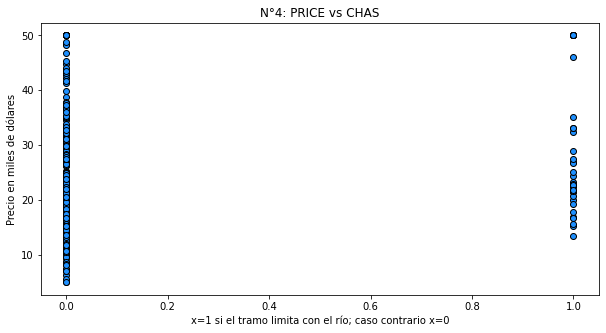

In [ ]:
#Atributo N°4 CHAS: Variable binaria que es unitaria si el tramo limita con el río Charles
y= PRICE_feature
x= CHAS_feature
plt.figure(figsize=(10,5))
plt.scatter(x, y, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.title('N°4: PRICE vs CHAS')
plt.ylabel('Precio en miles de dólares')
plt.xlabel('x=1 si el tramo limita con el río; caso contrario x=0')
plt.show()

La variable CHAS asociada a si existe un cauce de un rio en la zona de la vivienda o no, no muestra relación con la variable PRICE. No es de interés estudiar este atributo en la predicción del precio de las viviendas.

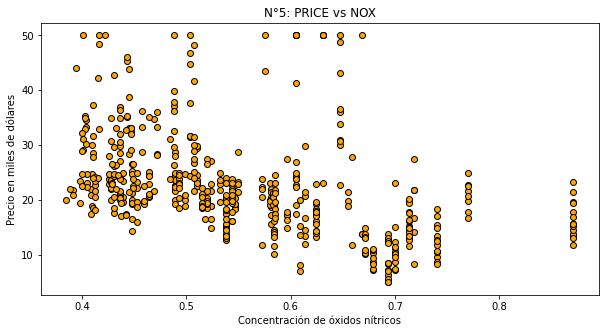

In [ ]:
#Atributo N°5 NOX: Concentración de óxidos nítricos en partes por 10 millones
y= PRICE_feature
x= NOX_feature
plt.figure(figsize=(10,5))
plt.scatter(x, y, facecolor="orange", edgecolor="k", label="datos")
plt.title('N°5: PRICE vs NOX')
plt.ylabel('Precio en miles de dólares')
plt.xlabel('Concentración de óxidos nítricos')
plt.show()

La variable NOX, indica la concentración de óxidos de nitrógeno, contaminantes. Se encuentra una relación con la variable target debido a que a mayores concentraciones de NOX, menores son los costos de las viviendas y viceversa. Estas dos variables tendrían una correlación negativa. 

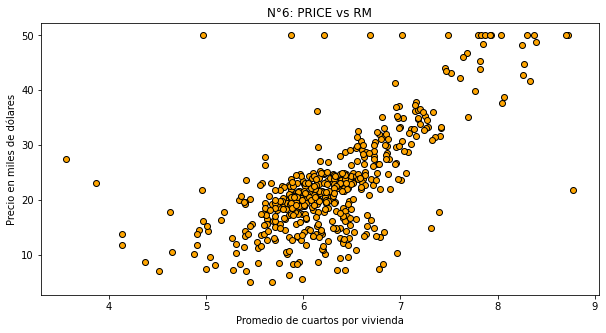

In [ ]:
#Atributo N°6 RN: Promedio de cuartos por vivienda
y= PRICE_feature
x= RM_feature
plt.figure(figsize=(10,5))
plt.scatter(x, y, facecolor="orange", edgecolor="k", label="datos")
plt.title('N°6: PRICE vs RM')
plt.ylabel('Precio en miles de dólares')
plt.xlabel('Promedio de cuartos por vivienda')
plt.show()

Esta variable que indica el promedio de cuartos por vivienda (RM), muestra una relación positiva y directa con el precio de las viviendas. A mayor cantidad de cuartos, mayores precios de las mismas.

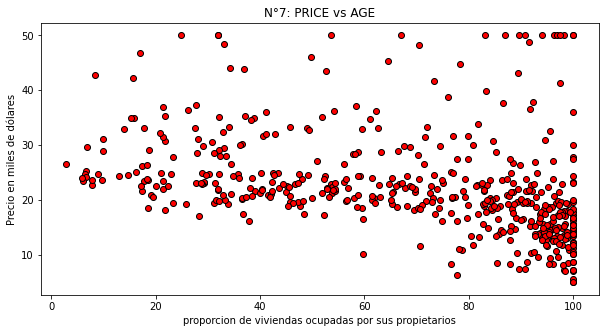

In [ ]:
#Atributo N°7 AGE: proporción de unidades ocupadas por sus propietarios construidas antes de 1940
y= PRICE_feature
x= AGE_feature
plt.figure(figsize=(10,5))
plt.scatter(x, y, facecolor="red", edgecolor="k", label="datos")
plt.title('N°7: PRICE vs AGE')
plt.ylabel('Precio en miles de dólares')
plt.xlabel('proporcion de viviendas ocupadas por sus propietarios')
plt.show()

Pareciera observarse una correlación negativa entre la variable AGE y la variable target, lo que indicaría que a las viviendas más antiguas pueden llegar a tener menor precio.

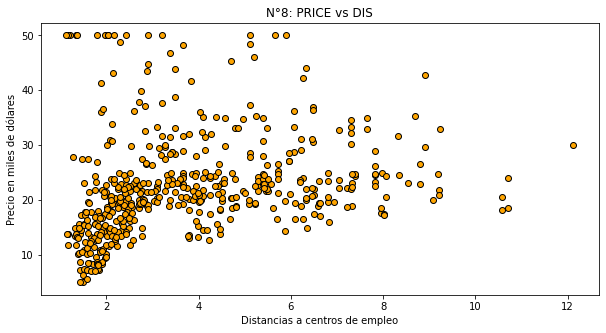

In [ ]:
#Atributo N°8 DIS: distancias ponderadas a cinco centros de empleo de Boston
y= PRICE_feature
x= DIS_feature
plt.figure(figsize=(10,5))
plt.scatter(x, y, facecolor="orange", edgecolor="k", label="datos")
plt.title('N°8: PRICE vs DIS')
plt.ylabel('Precio en miles de dólares')
plt.xlabel('Distancias a centros de empleo')
plt.show()

El atributo DIS que indica las distancias ponderadas a cinco centros de empleo en Boston, pareciera tener relación con el precio de las viviendas, pero no hay una correlación muy directa (al igual que sucedía con el atributo ZN)

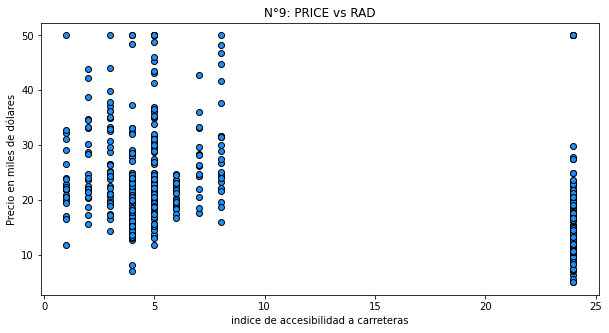

In [ ]:
#Atributo N°9 RAD: índice de accesibilidad a carreteras/autopistas radiales
y= PRICE_feature
x= RAD_feature
plt.figure(figsize=(10,5))
plt.scatter(x, y, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.title('N°9: PRICE vs RAD')
plt.ylabel('Precio en miles de dólares')
plt.xlabel('indice de accesibilidad a carreteras')
plt.show()

Si se analiza la variable RAD que representa el índice de accesibilidad a carreteras radiales, se pueden ver "estratos" de acuerdo a los valores que adopta el atributo RAD pero no se puede inferir una relación directa con la variable PRICE debido a que en cada uno de los estratos se puede encontrar prácticamente todo el rango de precios.
No sería conveniente utilizar este atributo para predecir la variable objetivo.

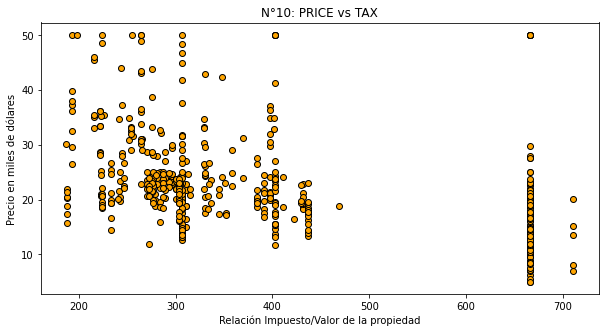

In [ ]:
#Atributo N°10 TAX: relación entre tasa de impuesto y al valor total de la propiedad multiplicado por $10,0000
y= PRICE_feature
x= TAX_feature
plt.figure(figsize=(10,5))
plt.scatter(x, y, facecolor="orange", edgecolor="k", label="datos")
plt.title('N°10: PRICE vs TAX')
plt.ylabel('Precio en miles de dólares')
plt.xlabel('Relación Impuesto/Valor de la propiedad')
plt.show()

En el atributo TAX hay estratos y si bien no pareciera una relación tan clara, podriamos analizar en profundidad su posible correlación con la variable target ya que aparentemente el precio de la vivienda se encuentra en el atributo TAX.

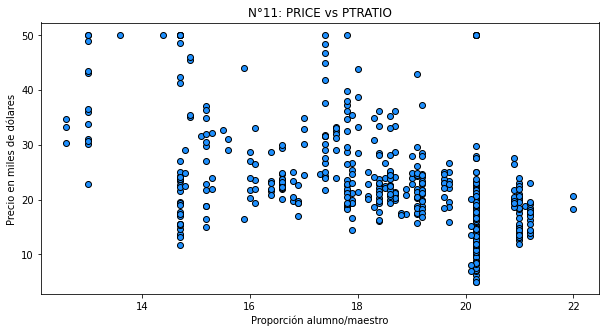

In [ ]:
#Atributo N°11 PTRATIO: proporción alumno/maestro
y= PRICE_feature
x= PTRATIO_feature
plt.figure(figsize=(10,5))
plt.scatter(x, y, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.title('N°11: PRICE vs PTRATIO')
plt.ylabel('Precio en miles de dólares')
plt.xlabel('Proporción alumno/maestro')
plt.show()

No se puede determinar a simple vista una relación entre el atributo PTRATIO que indica la proporción de alumnos por maestro con la variable PRICE. No se considera un atributo conveniente para predecir la variable target.

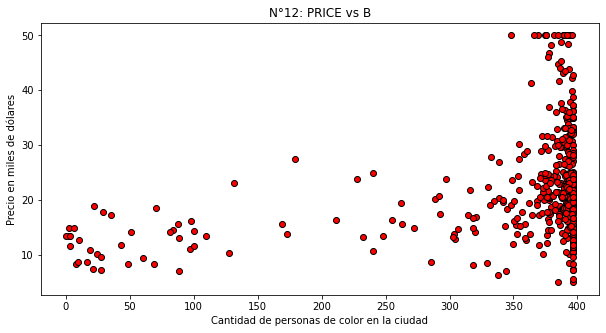

In [ ]:
#Atributo N°12 B: índice/proporción de gente de color en la ciudad
y= PRICE_feature
x= B_feature
plt.figure(figsize=(10,5))
plt.scatter(x, y, facecolor="red", edgecolor="k", label="datos")
plt.title('N°12: PRICE vs B')
plt.ylabel('Precio en miles de dólares')
plt.xlabel('Cantidad de personas de color en la ciudad')
plt.show()

Este atributo definitivamente NO tiene relación con la variable target y está conformado por sesgos y problemas éticos. No se considera este atributo para la predicción.

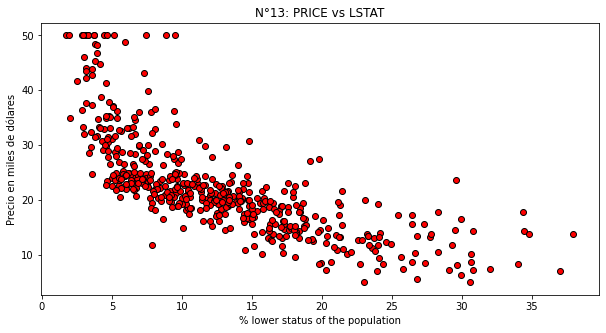

In [ ]:
#Atributo N°13 LSTAT: % lower status of the population
y= PRICE_feature
x= LSTAT_feature
plt.figure(figsize=(10,5))
plt.scatter(x, y, facecolor="red", edgecolor="k", label="datos")
plt.title('N°13: PRICE vs LSTAT')
plt.ylabel('Precio en miles de dólares')
plt.xlabel('% lower status of the population')
plt.show()

La variable LSTAT también muestra un comportamiento que se podría correlacionar con la variable target. Sin embargo esta variable a nuestro criterio presenta dilemas éticos por no estar relacionada directamente con ninguna caracteristica directa o indirecta de las viviendas.

********************************************************
De acuerdo al análisis de las gráficas presentadas anteriormente, el listado de los atributos más informativos para la predicción según nuestro criterio serían:

1. RM
2. TAX
3. NOX
4. INDUS
5. DIS
6. ZN
********************************************************

## Ejercicio 3: Regresión Lineal

1. Seleccione **un solo atributo** que considere puede ser el más apropiado.
2. Instancie una regresión lineal de **scikit-learn**, y entrénela usando sólo el atributo seleccionado.
3. Evalúe, calculando error cuadrático medio para los conjuntos de entrenamiento y evaluación.
4. Grafique el modelo resultante, junto con los puntos de entrenamiento y evaluación.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se puede obtener un error en test menor a 50.

### Atributo RM

Se selecciona el atributo RM para la regresión lineal.
RM indica el número de habitaciones por vivienda y se observó una relación positiva con PRICE.

In [ ]:
# Instanciar y entrenar acá:
# Se toma 80% para entrenamiento y 20% para test del modelo.
from sklearn.model_selection import train_test_split
X= RM_feature
y= PRICE_feature
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X, y, train_size=0.8, random_state=0) 
X_train_f.shape, X_test_f.shape
y_train_f.shape, y_test_f.shape

((404,), (102,))

In [ ]:
def linear_least_squares(X, y):
    X_b = np.stack((X, np.ones(X.shape[0])), axis=1)  # add bias
    return np.linalg.pinv(X_b.T.dot(X_b)).dot(X_b.T.dot(y))

def f(X, w):
    X_b = np.stack((X, np.ones(X.shape[0])), axis=1)  # add bias: (1, x)
    return X_b.dot(w)

In [ ]:
w = linear_least_squares(X_train_f, y_train_f)
w #dimensiones de w

array([  9.37638431, -36.47618963])

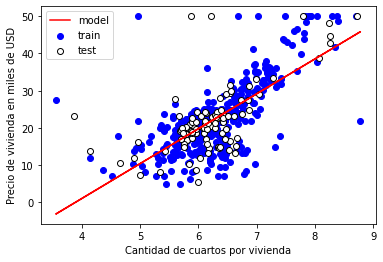

In [ ]:
# Graficar acá.
plt.scatter(X_train_f, y_train_f, color="blue", label="train")
plt.scatter(X_test_f, y_test_f, color="white", edgecolor="k", label="test")
x_start = min(np.min(X_train_f), np.min(X_test_f))
x_end = max(np.max(X_train_f), np.max(X_test_f))
x = np.linspace(x_start, x_end, 200).reshape(-1, 1)
plt.plot(RM_feature, f(RM_feature, w), color="red", label="model")
plt.xlabel('Cantidad de cuartos por vivienda')
plt.ylabel('Precio de vivienda en miles de USD')
plt.legend()
plt.show()

In [ ]:
# Predecir y evaluar acá.
y_train_f_pred = f(X_train_f, w)
y_test_f_pred = f(X_test_f, w)

from sklearn.metrics import mean_squared_error

train_error = mean_squared_error(y_train_f, y_train_f_pred)
test_error = mean_squared_error(y_test_f, y_test_f_pred)
print(f'Train error con atributo RM: {train_error:f}')
print(f'Test error con atributo RM: {test_error:f}')

Train error con atributo RM: 42.820479
Test error con atributo RM: 46.907352


Se puede ver que con el atributo seleccionado (RM) se obtiene un error en la muestra de test igual a 46.907 un valor MENOR a 50.

### Atributo DIS

Probamos con otro atributo. DIS: distancias ponderadas a cinco centros de empleo de Boston

In [ ]:
# Instanciar y entrenar acá:
from sklearn.model_selection import train_test_split
X= DIS_feature
y= PRICE_feature
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X, y, train_size=0.8, random_state=0)  #80% para entrenar y 20% para evaluar
X_train_f.shape, X_test_f.shape
y_train_f.shape, y_test_f.shape

((404,), (102,))

In [ ]:
def linear_least_squares(X, y):
    X_b = np.stack((X, np.ones(X.shape[0])), axis=1)  # add bias
    return np.linalg.pinv(X_b.T.dot(X_b)).dot(X_b.T.dot(y))

def f(X, w):
    X_b = np.stack((X, np.ones(X.shape[0])), axis=1)  # add bias: (1, x)
    return X_b.dot(w)

In [ ]:
X_train_f_bias = np.stack((np.ones(X_train_f.shape[0]), X_train_f), axis=1)  # add bias (todos iguales a 1)
X_train_f_bias
X_train_f_bias.shape

(404, 2)

In [ ]:
w = linear_least_squares(X_train_f, y_train_f)
w

array([ 1.24783095, 17.90725704])

In [ ]:
# 3. Predecir y evaluar acá.
y_train_f_pred = f(X_train_f, w)
y_test_f_pred = f(X_test_f, w)

from sklearn.metrics import mean_squared_error

train_error = mean_squared_error(y_train_f, y_train_f_pred)
test_error = mean_squared_error(y_test_f, y_test_f_pred)
print(f'Train error con atributo DIS: {train_error:f}')
print(f'Test error con atributo DIS: {test_error:f}')

Train error con atributo DIS: 78.420068
Test error con atributo DIS: 82.618741


Se puede ver que con el atributo seleccionado (DIS) se obtiene un error en la muestra de test MAYOR a 80, es decir un error de 82.619.

### Atributo NOX

Probamos con otro atributo. NOX: concentración de óxidos nítricos

In [ ]:
# Instanciar y entrenar acá:
from sklearn.model_selection import train_test_split
X= NOX_feature
y= PRICE_feature
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X, y, train_size=0.8, random_state=0)  #80% para entrenar y 20% para evaluar
X_train_f.shape, X_test_f.shape
y_train_f.shape, y_test_f.shape

((404,), (102,))

In [ ]:
def linear_least_squares(X, y):
    X_b = np.stack((X, np.ones(X.shape[0])), axis=1)  # add bias
    return np.linalg.pinv(X_b.T.dot(X_b)).dot(X_b.T.dot(y))

def f(X, w):
    X_b = np.stack((X, np.ones(X.shape[0])), axis=1)  # add bias: (1, x)
    return X_b.dot(w)

In [ ]:
X_train_f_bias = np.stack((np.ones(X_train_f.shape[0]), X_train_f), axis=1)  # add bias (todos iguales a 1)
X_train_f_bias
X_train_f_bias.shape

(404, 2)

In [ ]:
w = linear_least_squares(X_train_f, y_train_f)
w

array([-36.85600893,  43.09960743])

In [ ]:
# Predecir y evaluar acá.
y_train_f_pred = f(X_train_f, w)
y_test_f_pred = f(X_test_f, w)

from sklearn.metrics import mean_squared_error

train_error = mean_squared_error(y_train_f, y_train_f_pred)
test_error = mean_squared_error(y_test_f, y_test_f_pred)
print(f'Train error con atributo NOX: {train_error:f}')
print(f'Test error con atributo NOX: {test_error:f}')

Train error con atributo NOX: 67.161253
Test error con atributo NOX: 76.953760


Se puede ver que con el atributo seleccionado (NOX) se obtiene un error en la muestra de test MAYOR a 76.

### Atributo TAX

Probamos con otro atributo. TAX: relación entre el valor total de la vivienda y el impuesto.

In [ ]:
# Instanciar y entrenar acá:
from sklearn.model_selection import train_test_split
X= TAX_feature
y= PRICE_feature
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X, y, train_size=0.8, random_state=0)  #80% para entrenar y 20% para evaluar
X_train_f.shape, X_test_f.shape
y_train_f.shape, y_test_f.shape

((404,), (102,))

In [ ]:
def linear_least_squares(X, y):
    X_b = np.stack((X, np.ones(X.shape[0])), axis=1)  # add bias
    return np.linalg.pinv(X_b.T.dot(X_b)).dot(X_b.T.dot(y))

def f(X, w):
    X_b = np.stack((X, np.ones(X.shape[0])), axis=1)  # add bias: (1, x)
    return X_b.dot(w)

In [ ]:
X_train_f_bias = np.stack((np.ones(X_train_f.shape[0]), X_train_f), axis=1)  # add bias (todos iguales a 1)
X_train_f_bias
X_train_f_bias.shape

(404, 2)

In [ ]:
w = linear_least_squares(X_train_f, y_train_f)
w

array([-0.02763272, 33.74355776])

In [ ]:
# Predecir y evaluar acá.
y_train_f_pred = f(X_train_f, w)
y_test_f_pred = f(X_test_f, w)

from sklearn.metrics import mean_squared_error

train_error = mean_squared_error(y_train_f, y_train_f_pred)
test_error = mean_squared_error(y_test_f, y_test_f_pred)
print(f'Train error con atributo TAX: {train_error:f}')
print(f'Test error con atributo TAX: {test_error:f}')

Train error con atributo TAX: 62.908749
Test error con atributo TAX: 78.308314


Se puede ver que con el atributo seleccionado (TAX) se obtiene un error en la muestra de test MAYOR a 78.

### Atributo ZN

Probamos con otro atributo. ZN: proporción de suelo residencial zonificado para lotes de más de 25,000 pies cuadrados.

In [ ]:
# Instanciar y entrenar acá:
from sklearn.model_selection import train_test_split
X= ZN_feature
y= PRICE_feature
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X, y, train_size=0.8, random_state=0)  #80% para entrenar y 20% para evaluar
X_train_f.shape, X_test_f.shape
y_train_f.shape, y_test_f.shape

((404,), (102,))

In [ ]:
def linear_least_squares(X, y):
    X_b = np.stack((X, np.ones(X.shape[0])), axis=1)  # add bias
    return np.linalg.pinv(X_b.T.dot(X_b)).dot(X_b.T.dot(y))

def f(X, w):
    X_b = np.stack((X, np.ones(X.shape[0])), axis=1)  # add bias: (1, x)
    return X_b.dot(w)

In [ ]:
X_train_f_bias = np.stack((np.ones(X_train_f.shape[0]), X_train_f), axis=1)  # add bias (todos iguales a 1)
X_train_f_bias
X_train_f_bias.shape

(404, 2)

In [ ]:
w = linear_least_squares(X_train_f, y_train_f)
w

array([ 0.16018496, 20.72257099])

In [ ]:
# Predecir y evaluar acá.
y_train_f_pred = f(X_train_f, w)
y_test_f_pred = f(X_test_f, w)

from sklearn.metrics import mean_squared_error

train_error = mean_squared_error(y_train_f, y_train_f_pred)
test_error = mean_squared_error(y_test_f, y_test_f_pred)
print(f'Train error con atributo ZN: {train_error:f}')
print(f'Test error con atributo ZN: {test_error:f}')

Train error con atributo ZN: 70.843313
Test error con atributo ZN: 84.660344


Se puede ver que con el atributo seleccionado (ZN) se obtiene un error en la muestra de test MAYOR a 84.

### Atributo INDUS

Probamos con otro atributo. INDUS: proporción de acres comerciales no minoristas por ciudad.

In [ ]:
# Instanciar y entrenar acá:
from sklearn.model_selection import train_test_split
X= INDUS_feature
y= PRICE_feature
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X, y, train_size=0.8, random_state=0)  #80% para entrenar y 20% para evaluar
X_train_f.shape, X_test_f.shape
y_train_f.shape, y_test_f.shape

((404,), (102,))

In [ ]:
def linear_least_squares(X, y):
    X_b = np.stack((X, np.ones(X.shape[0])), axis=1)  # add bias
    return np.linalg.pinv(X_b.T.dot(X_b)).dot(X_b.T.dot(y))

def f(X, w):
    X_b = np.stack((X, np.ones(X.shape[0])), axis=1)  # add bias: (1, x)
    return X_b.dot(w)

In [ ]:
X_train_f_bias = np.stack((np.ones(X_train_f.shape[0]), X_train_f), axis=1)  # add bias (todos iguales a 1)
X_train_f_bias
X_train_f_bias.shape

(404, 2)

In [ ]:
w = linear_least_squares(X_train_f, y_train_f)
w

array([-0.6936726 , 30.32790719])

In [ ]:
# Predecir y evaluar acá.
y_train_f_pred = f(X_train_f, w)
y_test_f_pred = f(X_test_f, w)

from sklearn.metrics import mean_squared_error

train_error = mean_squared_error(y_train_f, y_train_f_pred)
test_error = mean_squared_error(y_test_f, y_test_f_pred)
print(f'Train error con atributo INDUS: {train_error:f}')
print(f'Test error con atributo INDUS: {test_error:f}')

Train error con atributo INDUS: 61.671119
Test error con atributo INDUS: 77.029052


Se puede ver que con el atributo seleccionado (INDUS) se obtiene un error en la muestra de test MAYOR a 77.


Se elige continuar el análisis con el **atributo RM** ya que es el que posee menor error en test para regresión lineal.

********************************************************

## Ejercicio 4: Regresión Polinomial

En este ejercicio deben entrenar regresiones polinomiales de diferente complejidad, siempre usando **scikit-learn**.

Deben usar **el mismo atributo** seleccionado para el ejercicio anterior.

1. Para varios grados de polinomio, haga lo siguiente:
    1. Instancie y entrene una regresión polinomial.
    2. Prediga y calcule error en entrenamiento y evaluación. Imprima los valores.
    3. Guarde los errores en una lista.
2. Grafique las curvas de error en términos del grado del polinomio.
3. Interprete la curva, identificando el punto en que comienza a haber sobreajuste, si lo hay.
4. Seleccione el modelo que mejor funcione, y grafique el modelo conjuntamente con los puntos.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se pueden obtener errores en test menores a 40 e incluso a 35.

### Polinomio grado 2

In [ ]:
#Se continúa trabajando con el atributo RM
from sklearn.model_selection import train_test_split
X= RM_feature
y= PRICE_feature
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X, y, train_size=0.8, random_state=0) 
X_train_f.shape, X_test_f.shape
y_train_f.shape, y_test_f.shape

((404,), (102,))

In [ ]:
#En scikit-learn cada dato de entrada debe ser un vector, no un número. 
# Se convierte cada dato en un vector de una dimensión:
X_train_f = X_train_f.reshape(-1, 1)
X_test_f = X_test_f.reshape(-1, 1)
X_train_f.shape, X_test_f.shape

((404, 1), (102, 1))

In [ ]:
# Se busca una Regresión polinomial de GRADO 2 con el atributo RM:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

degree = 2
pf = PolynomialFeatures(degree)
lr = LinearRegression(fit_intercept=False)  # el bias ya esta como feature
model = make_pipeline(pf, lr)

model.fit(X_train_f, y_train_f)

Z_train_f = pf.fit_transform(X_train_f, y_train_f)
lr.fit(Z_train_f, y_train_f)

lr.coef_

array([ 68.20229886, -23.56509374,   2.56037958])

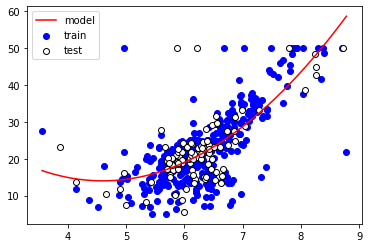

In [ ]:
# Graficar acá la regresión de grado 2:
plt.scatter(X_train_f, y_train_f, color="blue", label="train")
plt.scatter(X_test_f, y_test_f, color="white", edgecolor="k", label="test")
plt.plot(x, model.predict(x.reshape(-1, 1)), color="red", label="model")
plt.legend()
plt.show()

In [ ]:
#Cálculo de errores en regresión polinomial de grado 2 con el atributo RM:
y_train_pred = model.predict(X_train_f)
y_test_pred = model.predict(X_test_f)

train_error = mean_squared_error(y_train_f, y_train_pred)
test_error = mean_squared_error(y_test_f, y_test_pred)
print(f'Train error en polinomio de grado 2: {train_error:0.5}')
print(f'Test error en polinomio de grado 2: {test_error:0.5}')

Train error en polinomio de grado 2: 37.746
Test error en polinomio de grado 2: 39.795


Con la regresión polinomial de grado 2 (comparando con una regresión lineal) se logra reducir el error en el test de 46.9072 a 39.795

### Polinomio grado 3

In [ ]:
#Regresión polinomial de GRADO 3
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

degree = 3
pf = PolynomialFeatures(degree)
lr = LinearRegression(fit_intercept=False)  # el bias ya esta como feature
model = make_pipeline(pf, lr)

model.fit(X_train_f, y_train_f)

Z_train_f = pf.fit_transform(X_train_f, y_train_f)
lr.fit(Z_train_f, y_train_f)

lr.coef_

array([ 274.12931892, -124.87102604,   18.86964785,   -0.85958803])

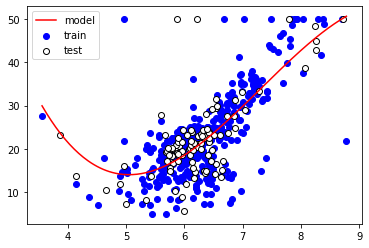

In [ ]:
# Graficar acá la regresión de grado 3:
plt.scatter(X_train_f, y_train_f, color="blue", label="train")
plt.scatter(X_test_f, y_test_f, color="white", edgecolor="k", label="test")
plt.plot(x, model.predict(x.reshape(-1, 1)), color="red", label="model")
plt.legend()
plt.show()

In [ ]:
#Cálculo de errores en regresión de grado 3:
y_train_pred = model.predict(X_train_f)
y_test_pred = model.predict(X_test_f)

train_error = mean_squared_error(y_train_f, y_train_pred)
test_error = mean_squared_error(y_test_f, y_test_pred)
print(f'Train error en polinomio de grado 3: {train_error:0.7}')
print(f'Test error en polinomio de grado 3: {test_error:0.7}')

Train error en polinomio de grado 3: 36.39566
Test error en polinomio de grado 3: 39.82576


### Polinomio grado 4

In [ ]:
#Regresión polinomial de GRADO 4
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

degree = 4
pf = PolynomialFeatures(degree)
lr = LinearRegression(fit_intercept=False)  # el bias ya esta como feature
model = make_pipeline(pf, lr)

model.fit(X_train_f, y_train_f)

Z_train_f = pf.fit_transform(X_train_f, y_train_f)
lr.fit(Z_train_f, y_train_f)

lr.coef_

array([-604.08398238,  474.76366216, -131.08855159,   15.45838577,
         -0.65297514])

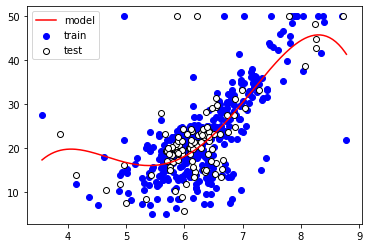

In [ ]:
# Graficar acá la regresión de grado 4:
plt.scatter(X_train_f, y_train_f, color="blue", label="train")
plt.scatter(X_test_f, y_test_f, color="white", edgecolor="k", label="test")
plt.plot(x, model.predict(x.reshape(-1, 1)), color="red", label="model")
plt.legend()
plt.show()

In [ ]:
#Cálculo de errores en regresión de grado 4:
y_train_pred = model.predict(X_train_f)
y_test_pred = model.predict(X_test_f)

train_error = mean_squared_error(y_train_f, y_train_pred)
test_error = mean_squared_error(y_test_f, y_test_pred)
print(f'Train error en polinomio de grado 4: {train_error:0.7}')
print(f'Test error en polinomio de grado 4: {test_error:0.7}')

Train error en polinomio de grado 4: 34.80845
Test error en polinomio de grado 4: 41.55393


********************************************************
En el polinomio de grado 4 se observa que el error en test aumenta respecto del polinomio de grado 3, por lo que se sospecha que podria ser el mejor modelo el grado 2 o el grado 3.
********************************************************

### Polinomios de grado mayores

In [ ]:
#Se prueban polinomios de varios grados, obteniendo valores de error en entrenamiento y evaluación:

train_errors = []
test_errors = []
degrees = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
for degree in degrees:
    # train:
    pf = PolynomialFeatures(degree)
    lr = LinearRegression(fit_intercept=False)
    model = make_pipeline(pf, lr)
    model.fit(X_train_f, y_train_f)
    
    # predict:
    y_train_pred = model.predict(X_train_f)
    y_test_pred = model.predict(X_test_f)
    
    # evaluate:
    train_error = mean_squared_error(y_train_f, y_train_pred)
    test_error = mean_squared_error(y_test_f, y_test_pred)
    train_errors.append(train_error)
    test_errors.append(test_error)

In [ ]:
train_errors, test_errors

([85.1437202235075,
  42.82047894172751,
  37.74552897028125,
  36.395658757671086,
  34.808446256913214,
  33.131121571949116,
  33.13011641557084,
  33.06035876459896,
  33.06035722589541,
  32.8548843047318],
 [81.58231743908232,
  46.9073516273953,
  39.794731163726546,
  39.82576208821606,
  41.553925676028065,
  41.038288578720795,
  41.0091769653148,
  42.394110713112596,
  42.39922618997137,
  46.039030275360616])

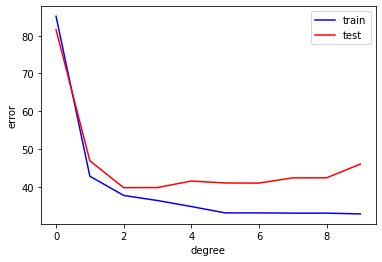

In [ ]:
# Graficar curvas de error acá.
plt.plot(degrees, train_errors, color="blue", label="train")
plt.plot(degrees, test_errors, color="red", label="test")
plt.legend()
plt.xlabel("degree")
plt.ylabel("error")
plt.show()

Se puede ver que en los polinomios de grado 2 y 3 se encuentran los menores valores para los errores en el set de test (muy similares entre ellos).
Se puede elegir el polinomio de grado 2 por tener menos variables a ajustar.

## Ejercicio 5: Regresión con más de un Atributo

En este ejercicio deben entrenar regresiones que toman más de un atributo de entrada.

1. Seleccione **dos o tres atributos** entre los más relevantes encontrados en el ejercicio 2.
2. Repita el ejercicio anterior, pero usando los atributos seleccionados. No hace falta graficar el modelo final.
3. Interprete el resultado y compare con los ejercicios anteriores. ¿Se obtuvieron mejores modelos? ¿Porqué?

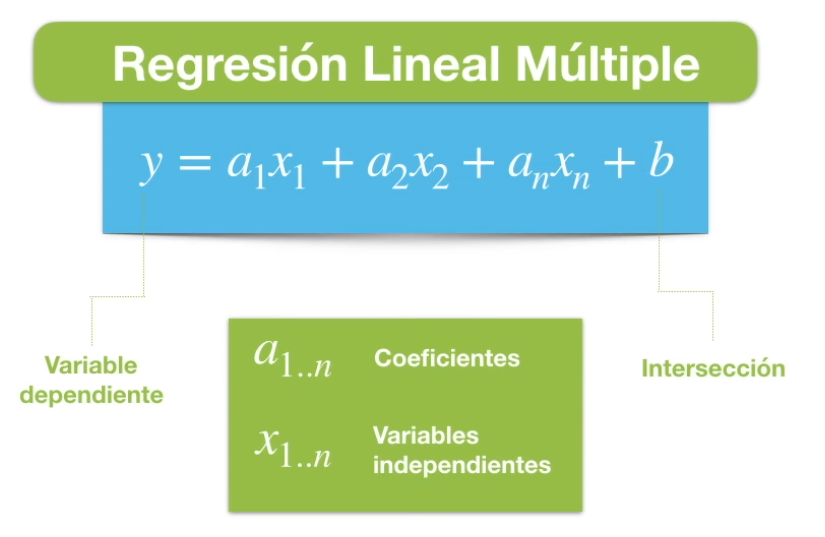

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### **Selección de atributos RM + NOX**

In [ ]:
#Se definen las variables X (multiparamétrica) e Y (variable target)
X_multivar = df_boston[['RM','NOX']]
X_multivar

,RM,NOX
0,6.575,0.538
1,6.421,0.469
2,7.185,0.469
3,6.998,0.458
4,7.147,0.458
...,...,...
501,6.593,0.573
502,6.120,0.573
503,6.976,0.573
504,6.794,0.573


In [ ]:
Y_multivar= df_boston[['PRICE']]
Y_multivar

,PRICE
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [ ]:
# Se toma 80% para entrenamiento y 20% para test del modelo de regresión lineal multiple
from sklearn.model_selection import train_test_split
X_multivar= np.array(X_multivar)
Y_multivar= np.array(Y_multivar)

X_multivar_train, X_multivar_test, Y_multivar_train, Y_multivar_test= train_test_split(X_multivar, Y_multivar, train_size=0.8, random_state=0)

X_multivar_train.shape, X_multivar_test.shape, Y_multivar_train.shape, Y_multivar_test.shape

((404, 2), (102, 2), (404, 1), (102, 1))

In [ ]:
#Se entrena el modelo aquí:
reg_multiple= LinearRegression() 
reg_multiple.fit(X_multivar_train, Y_multivar_train)
Y_multivar_pred_test= reg_multiple.predict(X_multivar_test)
Y_multivar_pred_train= reg_multiple.predict(X_multivar_train)

Y_multivar_pred_train.shape, Y_multivar_pred_test.shape 

((404, 1), (102, 1))

In [ ]:
#Se imprimen los coeficientes de las pendientes "a" de la regresión múltiple:
reg_multiple.coef_

array([[  8.28370138, -21.65929075]])

In [ ]:
#Se imprime el valor de la intersección "b" de la regresión múltiple:
reg_multiple.intercept_

array([-17.55023481])

In [ ]:
#Se imprime el valor de la "precisión" del modelo con la elección de 'RM' y 'NOX' como atributos:
reg_multiple.score(X_multivar_train, Y_multivar_train)

0.5632698500155269

In [ ]:
#Se calculan los errores en muestra de entrenamiento y en muestra de test:
train_error_multivar = mean_squared_error(Y_multivar_train, Y_multivar_pred_train)
test_error_multivar = mean_squared_error(Y_multivar_test, Y_multivar_pred_test)

print(f'Train error con 2 atributos: RM y NOX: {train_error_multivar:f}')
print(f'Test error con 2 atributos RM y NOX: {test_error_multivar:f}')

Train error con 2 atributos: RM y NOX: 37.184830
Test error con 2 atributos RM y NOX: 47.881681


**********************************************************************
**Análisis de los test error obtenidos**:

*   Regresión lineal con el atributo RM = 46.907
*   Regresión lineal con el atributo NOX = 76.954
*   Regresión múltiple con atributos RM + NOX = 47.882
*   Regresión polinomial de grado dos con RM = 39.975






In [ ]:
#Se crea la matriz de correlación de todas las variables del data set para ver la relación de cada una con PRICE (variable target)
#Es decir que es de interés la ULTIMA COLUMNA DE ESTA MATRIZ
df_boston_correlac= df_boston.corr()
df_boston_correlac

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


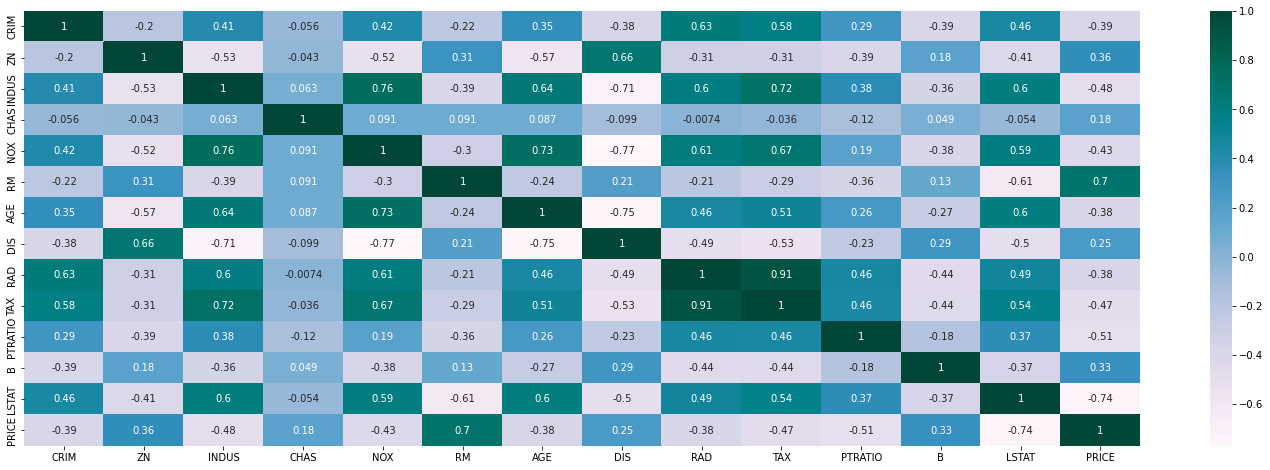

In [ ]:
#Graficamos esta matriz de correlacion:
fig= plt.figure(figsize=(25,8))
sns.heatmap(df_boston.corr(), annot=True, cmap='PuBuGn')
plt.show()

Analizando la matriz de correlación (la última columna que muestra las relaciones de los 12 atributos con la variable target) se puede corroborar que la variable RM es el atributo que posee mayor correlación positiva con la variable PRICE (valor 0.7).

En orden de importancia (valores decrecientes en correlación positiva) siguen las variables ZN (valor 0.36); la variable B (sin embargo no se considera por cuestiones éticas), la variable DIS (valor 0.25) y la variable CHAS (valor 0.18).

Por otro lado, si se considera la correlación negativa, dejando de lado las variables que poseen problemas éticos o que no tienen ninguna relación directa con el precio de las viviendas (LSTAT, PTRATIO, CRIM, AGE)
Se eligen los atributos INDUX (valor -0.48); TAX (-0.47); NOX (-0.43) y RAD (-0.38).
*********************************************************************

Se repite la regresión lineal múltiple con la combinación del atributo RM + ZN por un lado; y se realiza el equivalente con el atributo INDUX + TAX

*****************************************************************************

### Selección de atributos RM + ZN

In [ ]:
#Se definen las variables X (multiparamétrica) e Y (variable target)
X_multivar_1 = df_boston[['RM','ZN']]
X_multivar_1

,RM,ZN
0,6.575,18.0
1,6.421,0.0
2,7.185,0.0
3,6.998,0.0
4,7.147,0.0
...,...,...
501,6.593,0.0
502,6.120,0.0
503,6.976,0.0
504,6.794,0.0


In [ ]:
Y_multivar_1= df_boston[['PRICE']]
Y_multivar_1

,PRICE
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [ ]:
# Se toma 80% para entrenamiento y 20% para test del modelo de regresión lineal multiple
from sklearn.model_selection import train_test_split
X_multivar_1= np.array(X_multivar_1)
Y_multivar_1= np.array(Y_multivar_1)

X_multivar_train_1, X_multivar_test_1, Y_multivar_train_1, Y_multivar_test_1= train_test_split(X_multivar_1, Y_multivar_1, train_size=0.8, random_state=0)


In [ ]:
#Se entrena el modelo aquí:
reg_multiple_1= LinearRegression() 
reg_multiple_1.fit(X_multivar_train_1, Y_multivar_train_1)
Y_multivar_pred_test_1= reg_multiple_1.predict(X_multivar_test_1)
Y_multivar_pred_train_1= reg_multiple_1.predict(X_multivar_train_1)

In [ ]:
#Se imprimen los coeficientes de las pendientes "a" de la regresión múltiple:
reg_multiple_1.coef_

array([[8.51042165, 0.07309256]])

In [ ]:
#Se imprime el valor de la intersección "b" de la regresión múltiple:
reg_multiple_1.intercept_

array([-31.88116283])

In [ ]:
#Se imprime el valor de la "precisión" del modelo con la elección de 'RM' y 'NOX' como atributos:
reg_multiple_1.score(X_multivar_train_1, Y_multivar_train_1)

0.5278103711946291

In [ ]:
#Se calculan los errores en muestra de entrenamiento y en muestra de test:
train_error_multivar_1 = mean_squared_error(Y_multivar_train_1, Y_multivar_pred_train_1)
test_error_multivar_1 = mean_squared_error(Y_multivar_test_1, Y_multivar_pred_test_1)

print(f'Train error con 2 atributos: RM y ZN: {train_error_multivar_1:f}')
print(f'Test error con 2 atributos RM y ZN: {test_error_multivar_1:f}')

Train error con 2 atributos: RM y ZN: 40.203982
Test error con 2 atributos RM y ZN: 47.877874


**********************************************************************
**Análisis de los test error obtenidos**:

*   Regresión lineal con el atributo RM = 46.907
*   Regresión lineal con el atributo ZN = 84.66
*   Regresión múltiple con atributos RM + ZN = 47.877
*   Regresión polinomial de grado dos con RM = 39.975






### Selección de atributos INDUS + TAX

In [ ]:
#Se definen las variables X (multiparamétrica) e Y (variable target)
X_multivar_2 = df_boston[['INDUS','TAX']]
X_multivar_2

,INDUS,TAX
0,2.31,296.0
1,7.07,242.0
2,7.07,242.0
3,2.18,222.0
4,2.18,222.0
...,...,...
501,11.93,273.0
502,11.93,273.0
503,11.93,273.0
504,11.93,273.0


In [ ]:
Y_multivar_2= df_boston[['PRICE']]
Y_multivar_2

,PRICE
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [ ]:
# Se toma 80% para entrenamiento y 20% para test del modelo de regresión lineal multiple
from sklearn.model_selection import train_test_split
X_multivar_2= np.array(X_multivar_2)
Y_multivar_2= np.array(Y_multivar_2)

X_multivar_train_2, X_multivar_test_2, Y_multivar_train_2, Y_multivar_test_2= train_test_split(X_multivar_2, Y_multivar_2, train_size=0.8, random_state=0)


In [ ]:
#Se entrena el modelo aquí:
reg_multiple_2= LinearRegression() 
reg_multiple_2.fit(X_multivar_train_2, Y_multivar_train_2)
Y_multivar_pred_test_2= reg_multiple_2.predict(X_multivar_test_2)
Y_multivar_pred_train_2= reg_multiple_2.predict(X_multivar_train_2)

In [ ]:
#Se imprimen los coeficientes de las pendientes "a" de la regresión múltiple:
reg_multiple_2.coef_

array([[-0.43100013, -0.01493034]])

In [ ]:
#Se imprime el valor de la intersección "b" de la regresión múltiple:
reg_multiple_2.intercept_

array([33.42068449])

In [ ]:
#Se imprime el valor de la "precisión" del modelo con la elección de 'RM' y 'NOX' como atributos:
reg_multiple_2.score(X_multivar_train_2, Y_multivar_train_2)

0.3123907662484604

In [ ]:
#Se calculan los errores en muestra de entrenamiento y en muestra de test:
train_error_multivar_2 = mean_squared_error(Y_multivar_train_2, Y_multivar_pred_train_2)
test_error_multivar_2 = mean_squared_error(Y_multivar_test_2, Y_multivar_pred_test_2)

print(f'Train error con 2 atributos: INDUS y TAX: {train_error_multivar_2:f}')
print(f'Test error con 2 atributos INDUS y TAX: {test_error_multivar_2:f}')

Train error con 2 atributos: INDUS y TAX: 58.545608
Test error con 2 atributos INDUS y TAX: 77.011237


**********************************************************************
**Análisis de los test error obtenidos**:

*   Regresión lineal con el atributo INDUS = 77.029
*   Regresión lineal con el atributo TAX = 78.308
*   Regresión múltiple con atributos INDUS + TAX = 47.877


Se puede ver que haciendo regresión multiple **los errores disminuyen considerablemente**
**********************************************************************




## Más ejercicios (opcionales)

### Ejercicio 6: A Todo Feature

Entrene y evalúe regresiones pero utilizando todos los atributos de entrada (va a andar mucho más lento). Estudie los resultados.

### Ejercicio 7: Regularización

Entrene y evalúe regresiones con regularización "ridge". Deberá probar distintos valores de "alpha" (fuerza de la regularización). ¿Mejoran los resultados?


## Ejercicio 6 (opcional): Regresión lineal con todo el feature

In [ ]:
#Se define la variable X (conteniendo TODOS los atributos del feature)
X_allfeature = df_boston[['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']]
X_allfeature

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [ ]:
#Se define la variable Y (variable objetivo)
Y_allfeature= df_boston[['PRICE']]
Y_allfeature

,PRICE
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [ ]:
# Se toma 80% para entrenamiento y 20% para test del modelo de regresión lineal multiple
from sklearn.model_selection import train_test_split
X_all= np.array(X_allfeature)
Y_all= np.array(Y_allfeature)

X_all_train, X_all_test, Y_all_train, Y_all_test = train_test_split(X_all, Y_all, train_size=0.8, random_state=0)

In [ ]:
#Se entrena el modelo aquí:
reg_all= LinearRegression() 
reg_all.fit(X_all_train, Y_all_train)

Y_all_pred_train= reg_all.predict(X_all_train)
Y_all_pred_test= reg_all.predict(X_all_test)

In [ ]:
#Se imprimen los coeficientes de las pendientes "a" de la regresión de TODO el feature:
reg_all.coef_

array([[ -0.11944345,   0.04477995,   0.00548526,   2.34080361,
        -16.12360432,   3.70870901,  -0.00312108,  -1.38639737,
          0.24417833,  -0.01098964,  -1.04592119,   0.00811011,
         -0.49279272]])

In [ ]:
#Se imprime el valor de la intersección "b" de la regresión múltiple:
reg_all.intercept_

array([38.09169493])

In [ ]:
#Creamos un data frame para ver las predicciones versus los datos test
df_y_test= pd.DataFrame(Y_all_test, columns=['Y_test'])
df_y_pred= pd.DataFrame(Y_all_pred_test, columns=['Y_pred'])
pd.concat([df_y_test, df_y_pred],axis=1)

,Y_test,Y_pred
0,22.6,24.889638
1,50.0,23.721411
2,23.0,29.364999
3,8.3,12.122386
4,21.2,21.443823
...,...,...
97,24.7,25.442171
98,14.1,15.571783
99,18.7,17.937195
100,28.1,25.305888


In [ ]:
#Se imprime el valor de la "precisión" del modelo con la regresión de TODO el feature:
#The best possible score is 1.0
reg_all.score(X_all_train, Y_all_train)

0.7730135569264234

In [ ]:
#Se calculan los errores en muestra de entrenamiento y en muestra de test:
train_error_all = mean_squared_error(Y_all_train, Y_all_pred_train)
test_error_all = mean_squared_error(Y_all_test, Y_all_pred_test)

print(f'Train error todos los atributos del feature: {train_error_all:f}')
print(f'Test error con todos los atributos del feature: {test_error_all:f}')

Train error todos los atributos del feature: 19.326470
Test error con todos los atributos del feature: 33.448980


Se puede ver que cuando se entrena el modelo de regresión lineal con todos los atributos del feature se obtienen los MENORES errores tanto en la muestra de entrenamiento como en la muestra test.
**********************************************************************

## Ejercicio 7: Regularización (opcional)

Entrene y evalúe regresiones con regularización "ridge". Deberá probar distintos valores de "alpha" (fuerza de la regularización). ¿Mejoran los resultados?


In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
#Trabajamos con todos los features:
X_all_train.shape, X_all_test.shape, Y_all_train.shape, Y_all_test.shape

((404, 13), (102, 13), (404, 1), (102, 1))

### Ridge con Alpha=1

In [ ]:
#Se entrena el modelo Ridge aquí:
reg_all_ridge= Ridge() #Alpha por defecto es igual a 1
reg_all_ridge.fit(X_all_train, Y_all_train)

Ridge()

In [ ]:
#Vemos las predicciones del modelo Ridge:
Y_all_pred_train_ridge= reg_all_ridge.predict(X_all_train)
Y_all_pred_test_ridge= reg_all_ridge.predict(X_all_test)

In [ ]:
#Creamos un data frame para ver las predicciones versus los datos test
df_y_test_ridge= pd.DataFrame(Y_all_test, columns=['Y_test'])
df_y_pred_ridge= pd.DataFrame(Y_all_pred_test_ridge, columns=['Y_pred_ridge'])
pd.concat([df_y_test_ridge, df_y_pred_ridge],axis=1)

,Y_test,Y_pred_ridge
0,22.6,24.933720
1,50.0,23.275918
2,23.0,28.983407
3,8.3,12.183710
4,21.2,20.848595
...,...,...
97,24.7,25.731054
98,14.1,15.796370
99,18.7,17.910266
100,28.1,25.315928


In [ ]:
#Se imprime el valor de la "precisión" del modelo con la regresión de TODO el feature:
#The best possible score is 1.0
reg_all_ridge.score(X_all_train, Y_all_train)

0.7711260446978171

In [ ]:
#Se calculan los errores en muestra de entrenamiento y en muestra de test:
train_error_all_ridge = mean_squared_error(Y_all_train, Y_all_pred_train_ridge)
test_error_all_ridge = mean_squared_error(Y_all_test, Y_all_pred_test_ridge)

print(f'Train error todos los atributos del feature: {train_error_all_ridge:f}')
print(f'Test error con todos los atributos del feature: {test_error_all_ridge:f}')

Train error todos los atributos del feature: 19.487180
Test error con todos los atributos del feature: 34.231606


Con un valor de alpha=1 no se mejoran sustancialmente los resultados.

**********************************************************************

### Ridge con alpha=10

In [ ]:
#Se entrena el modelo Ridge con alpha=10 aquí:
reg_all_ridge_1= Ridge(alpha=10.0) 
reg_all_ridge_1.fit(X_all_train, Y_all_train)

Ridge(alpha=10.0)

In [ ]:
#Vemos las predicciones del modelo Ridge con alpha=10:
Y_all_pred_train_ridge_1= reg_all_ridge_1.predict(X_all_train)
Y_all_pred_test_ridge_1= reg_all_ridge_1.predict(X_all_test)

In [ ]:
#Creamos un data frame para ver las predicciones versus los datos test
df_y_test_ridge_1= pd.DataFrame(Y_all_test, columns=['Y_test'])
df_y_pred_ridge_1= pd.DataFrame(Y_all_pred_test_ridge_1, columns=['Y_pred_ridge_10'])
pd.concat([df_y_test_ridge_1, df_y_pred_ridge, df_y_pred_ridge_1],axis=1)

,Y_test,Y_pred_ridge,Y_pred_ridge_10
0,22.6,24.933720,24.915731
1,50.0,23.275918,23.053875
2,23.0,28.983407,28.279128
3,8.3,12.183710,12.443416
4,21.2,20.848595,20.257934
...,...,...,...
97,24.7,25.731054,26.125911
98,14.1,15.796370,15.929965
99,18.7,17.910266,18.075025
100,28.1,25.315928,25.302177


In [ ]:
#Se imprime el valor de la "precisión" del modelo con la regresión de TODO el feature:
#The best possible score is 1.0
reg_all_ridge_1.score(X_all_train, Y_all_train)

0.7654833147221556

In [ ]:
#Se calculan los errores en muestra de entrenamiento y en muestra de test:
train_error_all_ridge_1 = mean_squared_error(Y_all_train, Y_all_pred_train_ridge_1)
test_error_all_ridge_1 = mean_squared_error(Y_all_test, Y_all_pred_test_ridge_1)

print(f'Train error todos los atributos del feature: {train_error_all_ridge_1:f}')
print(f'Test error con todos los atributos del feature: {test_error_all_ridge_1:f}')

Train error todos los atributos del feature: 19.967623
Test error con todos los atributos del feature: 35.525132


**********************************************************************
### Ridge con alpha=100


In [ ]:
#Se entrena el modelo Ridge con alpha=100 aquí:
reg_all_ridge_2= Ridge(alpha=100.0) 
reg_all_ridge_2.fit(X_all_train, Y_all_train)

Ridge(alpha=100.0)

In [ ]:
#Vemos las predicciones del modelo Ridge con alpha=100:
Y_all_pred_train_ridge_2= reg_all_ridge_2.predict(X_all_train)
Y_all_pred_test_ridge_2= reg_all_ridge_2.predict(X_all_test)

In [ ]:
#Creamos un data frame para ver las predicciones versus los datos test
df_y_test_ridge_2= pd.DataFrame(Y_all_test, columns=['Y_test'])
df_y_pred_ridge_2= pd.DataFrame(Y_all_pred_test_ridge_2, columns=['Y_pred_ridge_100'])
pd.concat([df_y_test_ridge, df_y_pred_ridge, df_y_pred_ridge_1, df_y_pred_ridge_2],axis=1)

,Y_test,Y_pred_ridge,Y_pred_ridge_10,Y_pred_ridge_100
0,22.6,24.933720,24.915731,24.579886
1,50.0,23.275918,23.053875,23.780748
2,23.0,28.983407,28.279128,27.525447
3,8.3,12.183710,12.443416,13.532037
4,21.2,20.848595,20.257934,19.911304
...,...,...,...,...
97,24.7,25.731054,26.125911,27.134851
98,14.1,15.796370,15.929965,15.542501
99,18.7,17.910266,18.075025,19.296161
100,28.1,25.315928,25.302177,24.985178


In [ ]:
#Se imprime el valor de la "precisión" del modelo con la regresión de TODO el feature:
#The best possible score is 1.0
reg_all_ridge_2.score(X_all_train, Y_all_train)

0.7511219694364966

Se observa que al aumentar el valor alpha, mejoran las predicciones del modelo de regresión multiple.